First Feaure Engineering and Boost model building

First feature engineering: decompose and reorganize features

In [1]:
import pandas as pd

df = pd.read_csv('/Users/aklat/Downloads/Thsesis/Datasets/Moral Machine Data/1123_final_join_1.csv')

# convert float columns to int
float_cols = df.select_dtypes(include=['float64']).columns.tolist()
df[float_cols] = df[float_cols].astype(int)
df['Man'] = df['Man'].astype(float).round(0).astype(int)

# tranform to new features
df['Male'] = df['Man'] + df['OldMan'] + df['Boy'] + df['MaleExecutive'] + df['MaleAthlete'] + df['MaleDoctor'] + df['LargeMan']
df['Female'] = df['Woman'] + df['OldWoman'] + df['Girl'] + df['FemaleExecutive'] + df['FemaleAthlete'] + df['FemaleDoctor'] + df['LargeWoman']
df['Vulnerable'] = df['Pregnant'] + df['Stroller']
df['Children'] = df['Boy'] + df['Girl']  
df['Adult'] = df['Man'] + df['Woman'] + df['MaleExecutive'] + df['FemaleExecutive'] + df['FemaleAthlete'] + df['MaleAthlete'] + df['FemaleDoctor'] + df['MaleDoctor'] + df['LargeWoman'] + df['LargeMan']  
df['Senior'] = df['OldMan'] + df['OldWoman']  
df['Large'] = df['LargeMan'] + df['LargeWoman']  
df['Profession'] = df['MaleExecutive'] + df['FemaleExecutive'] + df['FemaleAthlete'] + df['MaleAthlete'] + df['FemaleDoctor'] + df['MaleDoctor']  
df['Criminal'] = df['Criminal']  
df['Homeless'] = df['Homeless']  
df['Animal'] = df['Dog'] + df['Cat'] 
df['PofessionalMale'] = df['MaleExecutive'] + df['MaleAthlete'] + df['MaleDoctor'] 
df['ProfessionalFemale'] = df['FemaleExecutive'] + df['FemaleAthlete'] + df['FemaleDoctor'] 

print(df[['Male', 'Female', 'Vulnerable', 'Children', 'Adult', 'Senior', 'Large', 'Profession', 'Criminal', 'Homeless', 'Animal']])

         Male  Female  Vulnerable  Children  Adult  Senior  Large  Profession  \
0           1       2           0         2      0       1      0           0   
1           1       0           0         0      1       0      0           0   
2           0       0           1         0      0       0      0           0   
3           3       0           0         0      3       0      0           2   
4           1       2           0         0      3       0      0           1   
...       ...     ...         ...       ...    ...     ...    ...         ...   
9415961     0       1           0         1      0       0      0           0   
9415962     1       0           0         0      1       0      0           1   
9415963     2       0           0         0      2       0      1           1   
9415964     0       4           0         0      3       1      1           1   
9415965     0       1           0         0      1       0      0           0   

         Criminal  Homeless

In [33]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'UserID', 'Review_gender', 'Unnamed: 0_y',
       'ResponseID', 'ExtendedSessionID', 'ScenarioOrder', 'Intervention',
       'PedPed', 'Barrier', 'CrossingSignal', 'NumberOfCharacters',
       'DiffNumberOFCharacters', 'Saved', 'Man', 'Woman', 'Pregnant',
       'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless',
       'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive',
       'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor',
       'MaleDoctor', 'Dog', 'Cat', 'Male', 'Female', 'Vulnerable', 'Children',
       'Adult', 'Senior', 'Large', 'Profession', 'Animal', 'PofessionalMale',
       'ProfessionalFemale', 'gender_ratio', 'Profession_gender_ratio',
       'senior_child_ratio', 'senior_gender_ratio', 'child_gebder_ratio',
       'large_gender_ratio', 'vulnerable_ratio', 'Profession_ratio',
       'Criminal_ratio', 'Homeless_ratio', 'animal_ratio', 'Senior_ratio',
       'Large_ratio', 'Children_ratio', 'Male_ratio', 'F

In [2]:
# relative ratio
df['gender_ratio'] = df['Male'] / (df['Female']+1e-6)
df['Profession_gender_ratio'] = df['PofessionalMale'] / (df['ProfessionalFemale'] + 1e-6)
df['senior_child_ratio'] = df['Senior'] / (df['Children'] + 1e-6)
df['senior_gender_ratio'] = df['OldMan'] / (df['OldWoman'] + 1e-6)
df['child_gebder_ratio'] = df['Boy'] / (df['Girl'] + 1e-6)
df['large_gender_ratio'] = df['LargeMan'] / (df['LargeWoman'] + 1e-6)

# absolute ratio
df['vulnerable_ratio'] = df['Vulnerable'] / df['NumberOfCharacters']
df['Profession_ratio'] = df['Profession'] / df['NumberOfCharacters']
df['Criminal_ratio'] = df['Criminal'] / df['NumberOfCharacters']
df['Homeless_ratio'] = df['Homeless'] / df['NumberOfCharacters']
df['animal_ratio'] = df['Animal'] / df['NumberOfCharacters']
df['Senior_ratio'] = df['Senior'] / df['NumberOfCharacters']
df['Large_ratio'] = df['Large'] / df['NumberOfCharacters']
df['Children_ratio'] = df['Children'] / df['NumberOfCharacters']
df['Male_ratio'] = df['Male'] / df['NumberOfCharacters']
df['Female_ratio'] = df['Female'] / df['NumberOfCharacters']

In [3]:
# keep 2 digits

ratio_cols = ['gender_ratio', 'Profession_gender_ratio', 'senior_child_ratio', 
              'senior_gender_ratio', 'child_gebder_ratio', 'large_gender_ratio',
              'vulnerable_ratio', 'Profession_ratio', 'Criminal_ratio', 
              'Homeless_ratio', 'animal_ratio', 'Senior_ratio', 
              'Large_ratio', 'Children_ratio', 'Male_ratio', 'Female_ratio']

df[ratio_cols] = df[ratio_cols].round(2)


XGBoost Model Building

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# features = [
#     'gender_ratio', 'Profession_gender_ratio', 'senior_child_ratio', 
#     'senior_gender_ratio', 'child_gebder_ratio', 'large_gender_ratio',
#     'vulnerable_ratio', 'Profession_ratio', 'Criminal_ratio', 
#     'Homeless_ratio', 'animal_ratio', 'Senior_ratio', 
#     'Large_ratio', 'Children_ratio', 'Male_ratio', 'Female_ratio','CrossingSignal', 'DiffNumberOFCharacters'
# ]
features = [
    'vulnerable_ratio', 'Profession_ratio', 'Criminal_ratio', 
    'Homeless_ratio', 'animal_ratio', 'Senior_ratio', 
    'Large_ratio', 'Children_ratio', 'Male_ratio', 'Female_ratio','CrossingSignal', 'DiffNumberOFCharacters'
]
X = df[features]
y = df['Saved'] 

# spilt train and test data set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Cross-validated AUC scores: [0.7649969  0.76577309 0.76555313 0.76525853 0.76408318]
Mean AUC: 0.7651


/Applications/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.67534	validation_1-auc:0.67760
[1]	validation_0-auc:0.70314	validation_1-auc:0.70514
[2]	validation_0-auc:0.71062	validation_1-auc:0.71242
[3]	validation_0-auc:0.71050	validation_1-auc:0.71227
[4]	validation_0-auc:0.71326	validation_1-auc:0.71489
[5]	validation_0-auc:0.71401	validation_1-auc:0.71566
[6]	validation_0-auc:0.71453	validation_1-auc:0.71634
[7]	validation_0-auc:0.71512	validation_1-auc:0.71694
[8]	validation_0-auc:0.71607	validation_1-auc:0.71782
[9]	validation_0-auc:0.72255	validation_1-auc:0.72449
[10]	validation_0-auc:0.72514	validation_1-auc:0.72719
[11]	validation_0-auc:0.72397	validation_1-auc:0.72604
[12]	validation_0-auc:0.72511	validation_1-auc:0.72726
[13]	validation_0-auc:0.73062	validation_1-auc:0.73272
[14]	validation_0-auc:0.73193	validation_1-auc:0.73401
[15]	validation_0-auc:0.73513	validation_1-auc:0.73725
[16]	validation_0-auc:0.73600	validation_1-auc:0.73815
[17]	validation_0-auc:0.73648	validation_1-auc:0.73857
[18]	validation_0-au

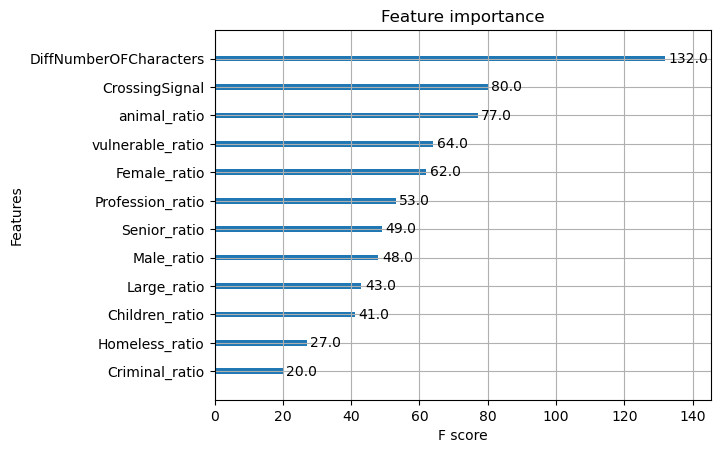

In [7]:
# XGBoost model
base_xgbmodel = XGBClassifier(
    n_estimators=100,            
    learning_rate=0.1,          
    max_depth=3,                 
    subsample=0.8,              
    colsample_bytree=0.8,       
    random_state=42
)

# Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(base_xgbmodel, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.4f}")

# model fit
base_xgbmodel.fit(X_train, y_train, eval_set=[(X_val, y_val), (X_test, y_test)], eval_metric="auc", early_stopping_rounds=10, verbose=True)

# predict
y_pred_proba = base_xgbmodel.predict_proba(X_test)[:, 1]
y_pred = base_xgbmodel.predict(X_test)

# evaluarion
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# fearure importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(base_xgbmodel, importance_type='weight')
plt.show()

XGBoost fine-tunning

Selected features: ['gender_ratio', 'Profession_gender_ratio', 'senior_child_ratio', 'large_gender_ratio', 'vulnerable_ratio', 'Profession_ratio', 'Criminal_ratio', 'Homeless_ratio', 'animal_ratio', 'Senior_ratio', 'Large_ratio', 'Children_ratio', 'Male_ratio', 'Female_ratio', 'CrossingSignal', 'DiffNumberOFCharacters']
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=  29.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=  34.8s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=4, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=  31.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=  10.7s
[CV] END colsample_bytree=0.8, learning

/Applications/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70961	validation_1-auc:0.71106
[1]	validation_0-auc:0.71592	validation_1-auc:0.71766
[2]	validation_0-auc:0.72086	validation_1-auc:0.72252
[3]	validation_0-auc:0.72115	validation_1-auc:0.72284
[4]	validation_0-auc:0.72169	validation_1-auc:0.72344
[5]	validation_0-auc:0.72237	validation_1-auc:0.72406
[6]	validation_0-auc:0.72754	validation_1-auc:0.72938
[7]	validation_0-auc:0.72830	validation_1-auc:0.73016
[8]	validation_0-auc:0.73555	validation_1-auc:0.73738
[9]	validation_0-auc:0.74277	validation_1-auc:0.74460
[10]	validation_0-auc:0.74350	validation_1-auc:0.74538
[11]	validation_0-auc:0.74607	validation_1-auc:0.74791
[12]	validation_0-auc:0.74851	validation_1-auc:0.75044
[13]	validation_0-auc:0.74998	validation_1-auc:0.75183
[14]	validation_0-auc:0.75233	validation_1-auc:0.75422
[15]	validation_0-auc:0.75392	validation_1-auc:0.75588
[16]	validation_0-auc:0.75474	validation_1-auc:0.75663
[17]	validation_0-auc:0.75668	validation_1-auc:0.75861
[18]	validation_0-au

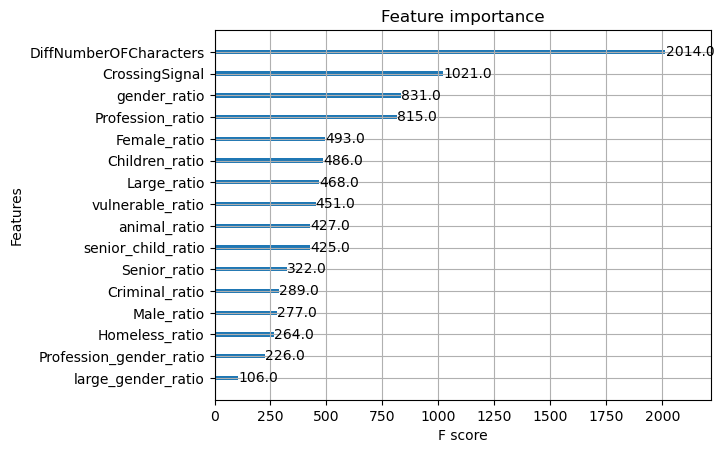

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# RFE
model_for_rfe = XGBClassifier(random_state=42)
rfe = RFECV(estimator=model_for_rfe, step=1, scoring='roc_auc', cv=5)
rfe.fit(X_train, y_train)

# update data set
selected_features = [f for f, s in zip(features, rfe.support_) if s]
print(f"Selected features: {selected_features}")
X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

# random search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 2, 3]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42
)
random_search.fit(X_train, y_train)
print(f"Best parameters: {random_search.best_params_}")

# train with the best model
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train, eval_set=[(X_val, y_val), (X_test, y_test)], eval_metric="auc", early_stopping_rounds=10, verbose=True)


y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


from xgboost import plot_importance
plot_importance(best_model, importance_type='weight')
plt.show()

In [5]:
# train with best estimators

best_xgbmodel = XGBClassifier(
    subsample=0.6,
    reg_lambda=1,
    reg_alpha=1,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=1.0,
    random_state=42
)
best_xgbmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric="auc", early_stopping_rounds=10, verbose=True)

val_pred_proba = best_xgbmodel.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, val_pred_proba)
print(f"Validation AUC: {val_auc:.4f}")

y_pred_proba = best_xgbmodel.predict_proba(X_test)[:, 1]
y_pred = best_xgbmodel.predict(X_test)

auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

/Applications/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.70961
[1]	validation_0-auc:0.71594
[2]	validation_0-auc:0.72058
[3]	validation_0-auc:0.72031
[4]	validation_0-auc:0.72126
[5]	validation_0-auc:0.72198
[6]	validation_0-auc:0.72704
[7]	validation_0-auc:0.72696
[8]	validation_0-auc:0.73579
[9]	validation_0-auc:0.73556
[10]	validation_0-auc:0.74127
[11]	validation_0-auc:0.74483
[12]	validation_0-auc:0.74647
[13]	validation_0-auc:0.74755
[14]	validation_0-auc:0.75021
[15]	validation_0-auc:0.75252
[16]	validation_0-auc:0.75454
[17]	validation_0-auc:0.75509
[18]	validation_0-auc:0.75658
[19]	validation_0-auc:0.75641
[20]	validation_0-auc:0.75804
[21]	validation_0-auc:0.75879
[22]	validation_0-auc:0.75935
[23]	validation_0-auc:0.76032
[24]	validation_0-auc:0.76074
[25]	validation_0-auc:0.76088
[26]	validation_0-auc:0.76178
[27]	validation_0-auc:0.76203
[28]	validation_0-auc:0.76213
[29]	validation_0-auc:0.76288
[30]	validation_0-auc:0.76319
[31]	validation_0-auc:0.76378
[32]	validation_0-auc:0.76390
[33]	validation_0-au

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# AdaBoost 
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
ada_model.fit(X_train, y_train)

# predict
val_pred_proba = ada_model.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, val_pred_proba)
print(f"Validation AUC: {val_auc:.4f}")
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]
y_pred = ada_model.predict(X_test)

# evaluation
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation AUC: 0.7409
AUC: 0.7430
Accuracy: 0.6794
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.66    470665
           1       0.66      0.72      0.69    470932

    accuracy                           0.68    941597
   macro avg       0.68      0.68      0.68    941597
weighted avg       0.68      0.68      0.68    941597



In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

# randomizedSearch
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [2, 4, 6]
}

base_estimator = DecisionTreeClassifier(random_state=42)

ada_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

random_search = RandomizedSearchCV(
    estimator=ada_model,
    param_distributions=param_distributions,
    scoring='roc_auc',
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_ada_model = random_search.best_estimator_

# evaluate on validation set
val_pred_proba = best_ada_model.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, val_pred_proba)
print(f"Validation AUC: {val_auc:.4f}")

# evaluate on test set
y_pred_proba = best_ada_model.predict_proba(X_test)[:, 1]
y_pred = best_ada_model.predict(X_test)

auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

[CV] END estimator__max_depth=4, learning_rate=0.01, n_estimators=100; total time=40.8min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.01, n_estimators=100; total time=41.1min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.5, n_estimators=300; total time=71.8min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.5, n_estimators=300; total time=72.0min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.5, n_estimators=300; total time=72.2min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.01, n_estimators=100; total time=38.1min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.1, n_estimators=200; total time=79.1min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.1, n_estimators=200; total time=79.3min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.1, n_estimators=200; total time=79.4min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.1, n_estimators=100; total time=52.6min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.01, n_estimators=100; total time=23.4min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.01, n_estimators=100; total time=23.2min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.01, n_estimators=100; total time=23.3min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.1, n_estimators=100; total time=51.7min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.1, n_estimators=100; total time=51.8min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.5, n_estimators=200; total time=76.5min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.5, n_estimators=200; total time=77.0min
[CV] END estimator__max_depth=4, learning_rate=0.5, n_estimators=200; total time=76.7min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.01, n_estimators=300; total time=159.9min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.01, n_estimators=300; total time=159.9min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.01, n_estimators=300; total time=158.6min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.1, n_estimators=100; total time=175.2min
[CV] END estimator__max_depth=4, learning_rate=0.1, n_estimators=100; total time=175.1min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.1, n_estimators=100; total time=129.4min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.5, n_estimators=300; total time=252.0min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.5, n_estimators=300; total time=251.9min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.5, n_estimators=100; total time=174.7min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.5, n_estimators=100; total time=257.2min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.01, n_estimators=200; total time=157.5min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.5, n_estimators=100; total time=228.0min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.01, n_estimators=200; total time=221.3min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.01, n_estimators=200; total time=221.4min
[CV] END estimator__max_depth=2, learning_rate=0.1, n_estimators=200; total time=221.2min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.5, n_estimators=300; total time=426.2min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.1, n_estimators=200; total time=190.8min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.1, n_estimators=200; total time=108.7min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.5, n_estimators=100; total time=45.2min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.1, n_estimators=300; total time=140.0min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.1, n_estimators=300; total time=77.8min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.5, n_estimators=100; total time=47.0min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.1, n_estimators=300; total time=77.9min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.01, n_estimators=300; total time=78.5min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.01, n_estimators=300; total time=78.7min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.01, n_estimators=300; total time=79.1min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=4, learning_rate=0.5, n_estimators=100; total time=40.7min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.1, n_estimators=100; total time=23.8min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=2, learning_rate=0.1, n_estimators=100; total time=22.7min
[CV] END estimator__max_depth=2, learning_rate=0.1, n_estimators=100; total time=22.5min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.1, n_estimators=200; total time=108.2min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.1, n_estimators=200; total time=106.8min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.1, n_estimators=200; total time=108.0min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.5, n_estimators=200; total time=108.9min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END estimator__max_depth=6, learning_rate=0.5, n_estimators=200; total time=108.3min
[CV] END estimator__max_depth=6, learning_rate=0.5, n_estimators=200; total time=108.5min
[CV] END estimator__max_depth=6, learning_rate=0.01, n_estimators=100; total time=47.9min
[CV] END estimator__max_depth=6, learning_rate=0.01, n_estimators=100; total time=44.6min
[CV] END estimator__max_depth=6, learning_rate=0.01, n_estimators=100; total time=37.5min
[CV] END estimator__max_depth=6, learning_rate=0.1, n_estimators=300; total time=133.9min
[CV] END estimator__max_depth=6, learning_rate=0.1, n_estimators=300; total time=133.8min
[CV] END estimator__max_depth=6, learning_rate=0.1, n_estimators=300; total time=87.2min


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'learning_rate': 0.5, 'estimator__max_depth': 6}
Validation AUC: 0.7803
AUC: 0.7819
Accuracy: 0.7167
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72    470665
           1       0.71      0.72      0.72    470932

    accuracy                           0.72    941597
   macro avg       0.72      0.72      0.72    941597
weighted avg       0.72      0.72      0.72    941597



In [41]:
best_ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=6),  # Base learner
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

best_ada_model.fit(X_train, y_train)

val_pred_proba = best_ada_model.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, val_pred_proba)
print(f"Validation AUC: {val_auc:.4f}")

y_pred_proba = best_ada_model.predict_proba(X_test)[:, 1]
y_pred = best_ada_model.predict(X_test)
test_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation AUC: 0.7803
Test AUC: 0.7819
Test Accuracy: 0.7167
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72    470665
           1       0.71      0.72      0.72    470932

    accuracy                           0.72    941597
   macro avg       0.72      0.72      0.72    941597
weighted avg       0.72      0.72      0.72    941597



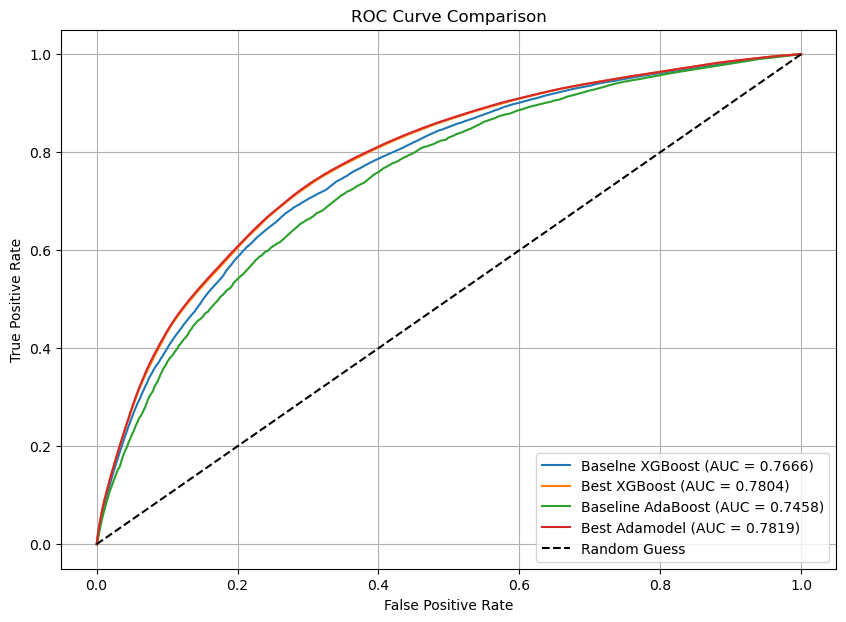

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# AUC-ROC
def plot_auc(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 7))
    
    for model, name in zip(models, model_names):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# 4 models
models = [base_xgbmodel, best_xgbmodel, ada_model, best_ada_model]
model_names = ["Baselne XGBoost", "Best XGBoost", "Baseline AdaBoost", "Best Adamodel"]

# plot
plot_auc(models, model_names, X_test, y_test)

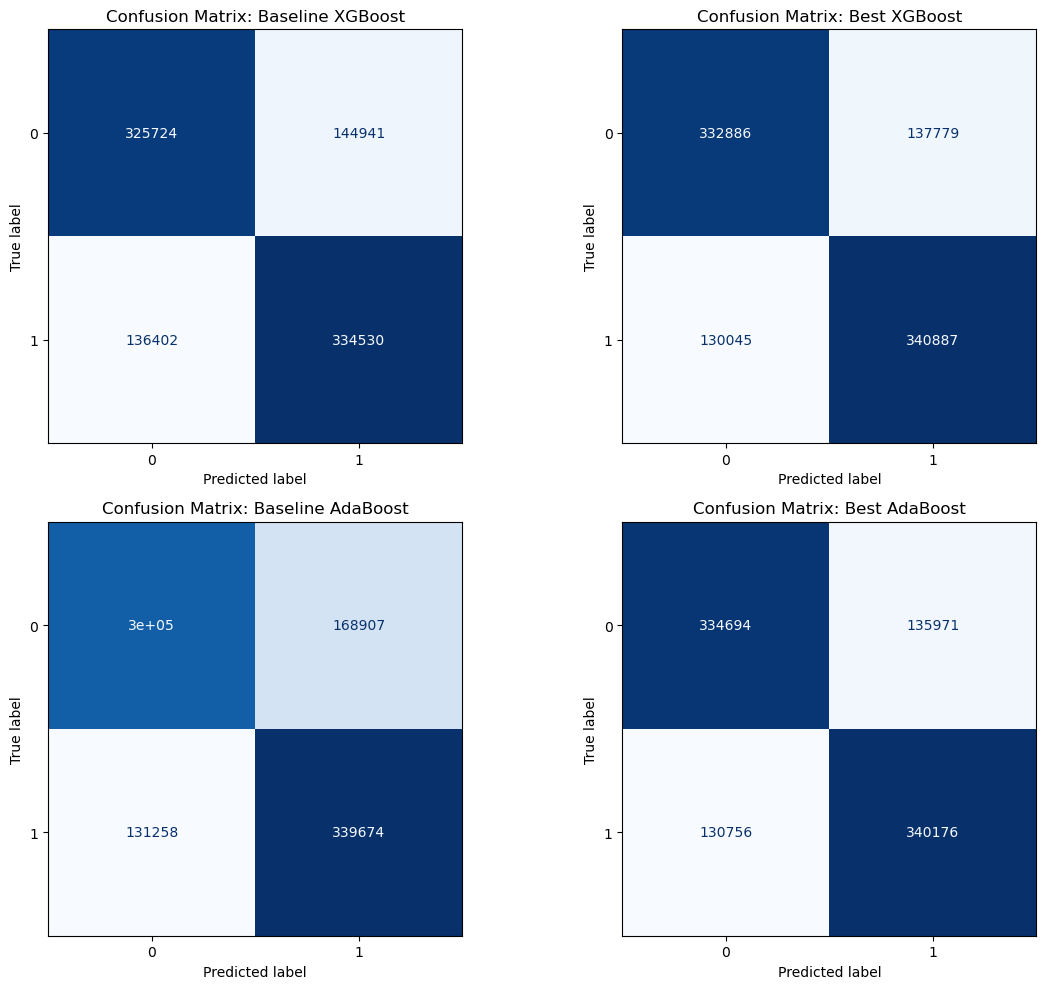

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = [base_xgbmodel, best_xgbmodel, ada_model, best_ada_model]
model_names = ["Baseline XGBoost", "Best XGBoost", "Baseline AdaBoost", "Best AdaBoost"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot the confusion matrix for each model
for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(f"Confusion Matrix: {name}")

plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Function to evaluate metrics
def evaluate_models(models, model_names, X_test, y_test):
    results = []
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='binary')
        precision = precision_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-Score": f1
        })
    return pd.DataFrame(results)

models = [base_xgbmodel, best_xgbmodel, ada_model, best_ada_model]
model_names = ["Baseline XGBoost", "Best XGBoost", "Baseline AdaBoost", "Best AdaBoost"]

evaluation_table = evaluate_models(models, model_names, X_test, y_test)
print(evaluation_table)


               Model  Accuracy    Recall  Precision  F1-Score
0   Baseline XGBoost  0.701207  0.710357   0.697706  0.703975
1       Best XGBoost  0.715564  0.723856   0.712160  0.717961
2  Baseline AdaBoost  0.681217  0.721280   0.667886  0.693557
3      Best AdaBoost  0.716729  0.722346   0.714435  0.718369


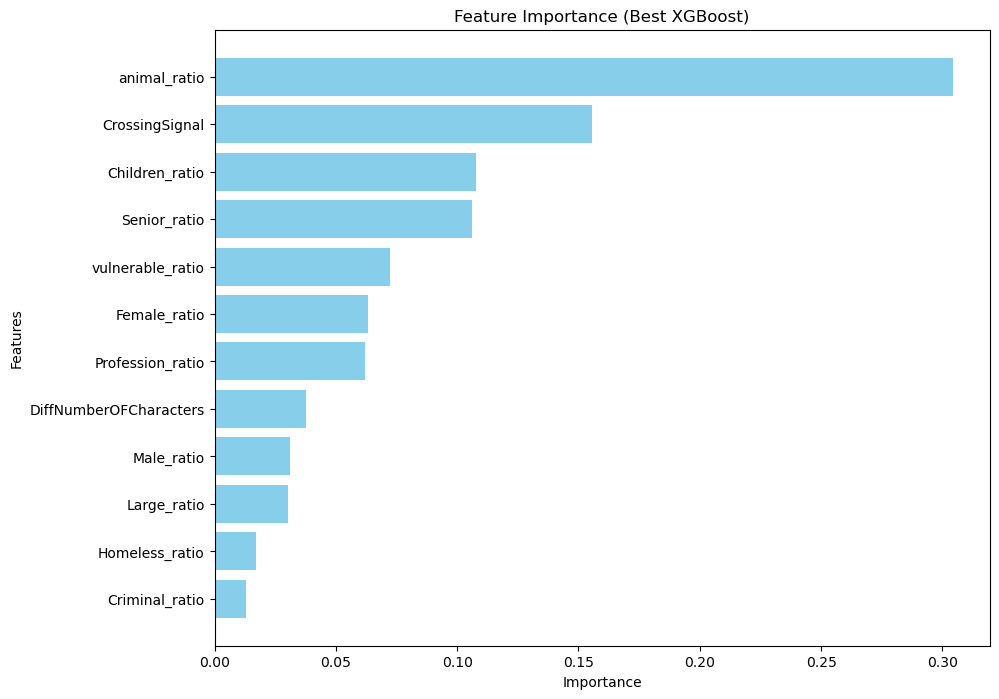

In [9]:
import numpy as np

# Assume best_xgbmodel is the best XGBoost model
# feature importance
feature_importances = best_xgbmodel.feature_importances_
features = X_train.columns  

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Best XGBoost)")
plt.gca().invert_yaxis()  
plt.show()


In [54]:
import joblib

# Save each model
model_names = ["base_xgbmodel", "best_xgbmodel", "ada_model", "best_ada_model"]
models = [base_xgbmodel, best_xgbmodel, ada_model, best_ada_model]

for model, name in zip(models, model_names):
    joblib.dump(model, f"{name}.joblib")  # Save as .joblib files
    print(f"Model {name} saved successfully.")


Model base_xgbmodel saved successfully.
Model best_xgbmodel saved successfully.
Model ada_model saved successfully.
Model best_ada_model saved successfully.


xgboost analysis

In [1]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


1. Extract Decision Rules from Trees

XGBoost models are tree-based, so you can inspect the individual decision trees to see which features and thresholds were used for splits.

<Figure size 10000x6000 with 0 Axes>

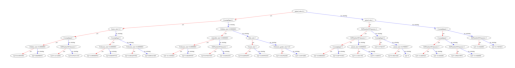

In [6]:
from xgboost import plot_tree, XGBClassifier
import matplotlib.pyplot as plt
import joblib
best_xgbmodel = joblib.load('best_xgbmodel.joblib')
# Plot a specific tree (e.g., the first tree)
plt.figure(figsize=(100, 60))  # Increase figure size
plot_tree(best_xgbmodel, num_trees=0)
plt.savefig("tree_plot.svg", format='svg', bbox_inches='tight')  # Save as SVG
plt.savefig("tree_plot.pdf", format='pdf', bbox_inches='tight')  # Save as PDF
plt.show()



In [7]:
from xgboost import to_graphviz
dot_data = to_graphviz(best_xgbmodel, num_trees=0)

dot_data.render("tree_plot", format="png", cleanup=True)  # Saves tree_plot.png

'tree_plot.png'

2. Use SHAP for Feature-Level Insights

SHAP values explain the contribution of each feature for individual predictions. This can help identify the model's preference for certain feature ranges.

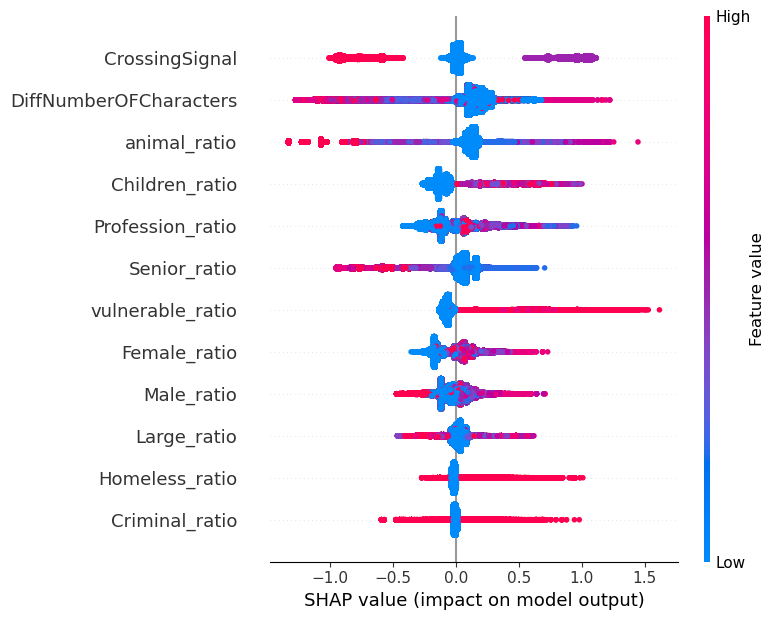

In [6]:
import shap

# a SHAP explainer for the XGBoost model
explainer = shap.Explainer(best_xgbmodel)
shap_values = explainer(X_test)  

# Summary plot 
shap.summary_plot(shap_values, X_test)

# shap.dependence_plot("animal_ratio", shap_values.values, X_test)

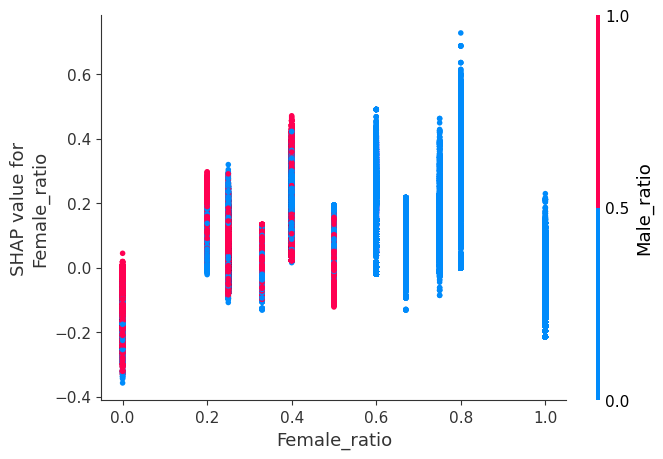

In [7]:
import shap

shap.dependence_plot(
    "Female_ratio",          
    shap_values.values,      
    X_test,                    
    interaction_index="Male_ratio" 
)


3. Inspect Feature Split Histograms

Analyze how often specific features and thresholds are used across the model’s trees.

In [17]:
from xgboost import Booster

# Extract and parse the raw booster model
booster = best_xgbmodel.get_booster()
splits_female = booster.get_split_value_histogram(feature='Female_ratio', as_pandas=True)
splits_male = booster.get_split_value_histogram(feature='Male_ratio', as_pandas=True)

print("Spilts of Female: ", splits_female)
print("Spilts of Male: ", splits_male)



Spilts of Female:     SplitValue  Count
0        0.28  146.0
1        0.36   34.0
2        0.44   56.0
3        0.52   42.0
4        0.68   81.0
5        0.76   12.0
6        0.84   32.0
7        1.00  112.0
Spilts of Male:     SplitValue  Count
0        0.28  298.0
1        0.36   64.0
2        0.44   48.0
3        0.52   87.0
4        0.68  118.0
5        0.76   53.0
6        0.84   67.0
7        1.00  289.0
